# Local Search Methods

## Table of Contents
* [1 Load data](#load-data)
* [2 Define search space](#define-search-space)
* [3 Initialize the optimizers](#initialize-the-optimizers)
    * [3.1 Initialize Hill Climbing](#initialize-hill-climbing)
    * [3.2 Initialize Stochastic Hill Climbing](#initialize-stochastic-hill-climbing)
    * [3.3 Initialize Tabu Search](#initialize-tabu-search)
* [4 Run the optimization](#run-the-optimization)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


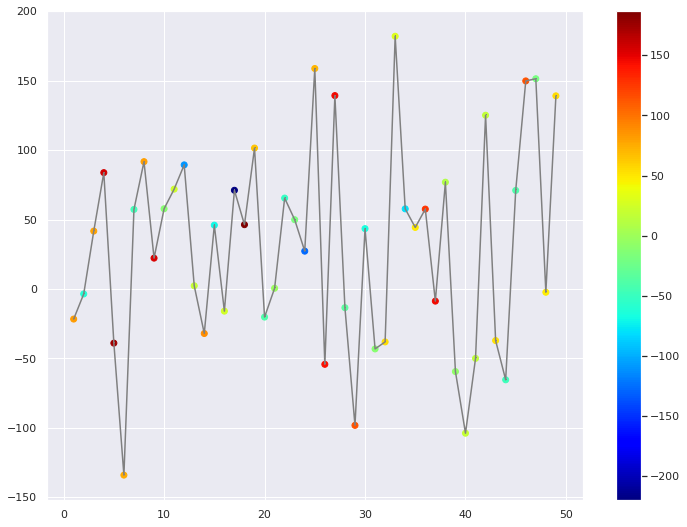

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns

from sklearn.datasets import load_iris

from hyperactive import HillClimbingOptimizer
from hyperactive import StochasticHillClimbingOptimizer
from hyperactive import TabuOptimizer

# sns.set(color_codes=True)
# sns.set_palette(sns.color_palette("RdBu", n_colors=7))
# sns.set(rc={'figure.figsize':(12, 9)})


df=pd.DataFrame({'x': range(1,50), 'y': np.random.randn(49)*80+range(1,50), 'z': np.random.randn(49)*80+range(1,50) })

plt.set_cmap('jet')

# plot
plt.plot( 'x', 'y', data=df, linestyle='-', marker=',', color="gray")
plt.scatter(df['x'], df['y'], c=df['z'], marker='o')
plt.colorbar()
plt.show()

## 1 Load data

In [9]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


## 2 Define search space

In [10]:
# this defines the model and hyperparameter search space
search_config = {
    'sklearn.neighbors.KNeighborsClassifier': {
        'n_neighbors': range(1, 100),
        'weights': ["uniform", "distance"],
        'p': [1, 2]
    }
}

## 3 Initialize the optimizers

## 3.1 Initialize Hill Climbing

In [11]:
opt_hc = HillClimbingOptimizer(search_config, n_iter=100, cv=3)

## 3.2 Initialize Stochastic Hill Climbing

In [12]:
opt_shc = StochasticHillClimbingOptimizer(search_config, n_iter=100, cv=3)

## 3.3 Initialize Tabu Search

In [13]:
opt_t = TabuOptimizer(search_config, n_iter=100, cv=3)

## 4 Run the optimization

In [43]:
# search best hyperparameter for given data
opt_hc.fit(X, y)






 accuracy_score 0.9669117647058822
start_point = {'sklearn.neighbors.KNeighborsClassifier.0': {'n_neighbors': [55], 'weights': ['distance'], 'p': [2]}}


In [15]:
opt_shc.fit(X, y)


 accuracy_score 0.9669117647058822
start_point = {'sklearn.neighbors.KNeighborsClassifier.0': {'n_neighbors': [55], 'weights': ['distance'], 'p': [2]}}


In [16]:
opt_t.fit(X, y)


 accuracy_score 0.9669117647058822
start_point = {'sklearn.neighbors.KNeighborsClassifier.0': {'n_neighbors': [55], 'weights': ['distance'], 'p': [2]}}
